In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [34]:
tcars = pd.read_csv('ToyotaCorolla.csv', encoding= 'latin1')
tcars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [35]:
tcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [36]:
tcars.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [37]:
tcars.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
tcars2=pd.concat([tcars.iloc[:,2:7],tcars.iloc[:,8:]],axis=1)
tcars2

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,Blue,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,Silver,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,Blue,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,Black,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,Black,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,Blue,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,9,1998,19000,86,0,Grey,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,10,1998,17016,86,0,Blue,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,11,1998,16916,86,1,Grey,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [39]:
tcars2[tcars2.duplicated()]

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
113,24950,8,1,2004,13253,116,1,Grey,0,2000,...,1,1,1,0,0,0,0,0,0,0


In [40]:
tcars3=tcars2.drop_duplicates().reset_index(drop=True)
tcars3

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,Blue,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,Silver,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,Blue,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,Black,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,Black,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,12,1998,20544,86,1,Blue,0,1300,...,1,1,1,0,1,1,1,0,0,0
1431,10845,72,9,1998,19000,86,0,Grey,0,1300,...,0,0,1,0,0,1,1,0,0,0
1432,8500,71,10,1998,17016,86,0,Blue,0,1300,...,0,0,1,0,0,0,1,0,0,0
1433,7250,70,11,1998,16916,86,1,Grey,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [41]:
tcars3.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [42]:
tcars3=tcars3.rename({'Age_08_04':'Age'},axis=1)
tcars3

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,Blue,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,Silver,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,Blue,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,Black,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,Black,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,12,1998,20544,86,1,Blue,0,1300,...,1,1,1,0,1,1,1,0,0,0
1431,10845,72,9,1998,19000,86,0,Grey,0,1300,...,0,0,1,0,0,1,1,0,0,0
1432,8500,71,10,1998,17016,86,0,Blue,0,1300,...,0,0,1,0,0,0,1,0,0,0
1433,7250,70,11,1998,16916,86,1,Grey,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [43]:
tcars4 = tcars3.drop(['Mfg_Month', 'Mfg_Year', 'Met_Color',
       'Color', 'Automatic', 'Cylinders', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'], axis=1)

In [44]:
tcars4

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Correlation

In [45]:
tcars4.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

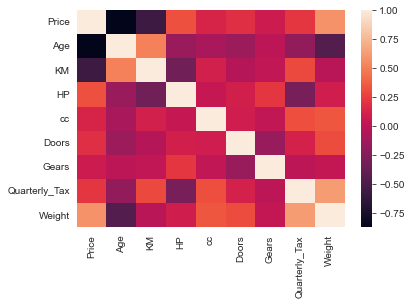

In [46]:
sns.heatmap(tcars4.corr())

# Scatterplot between variables along with histograms

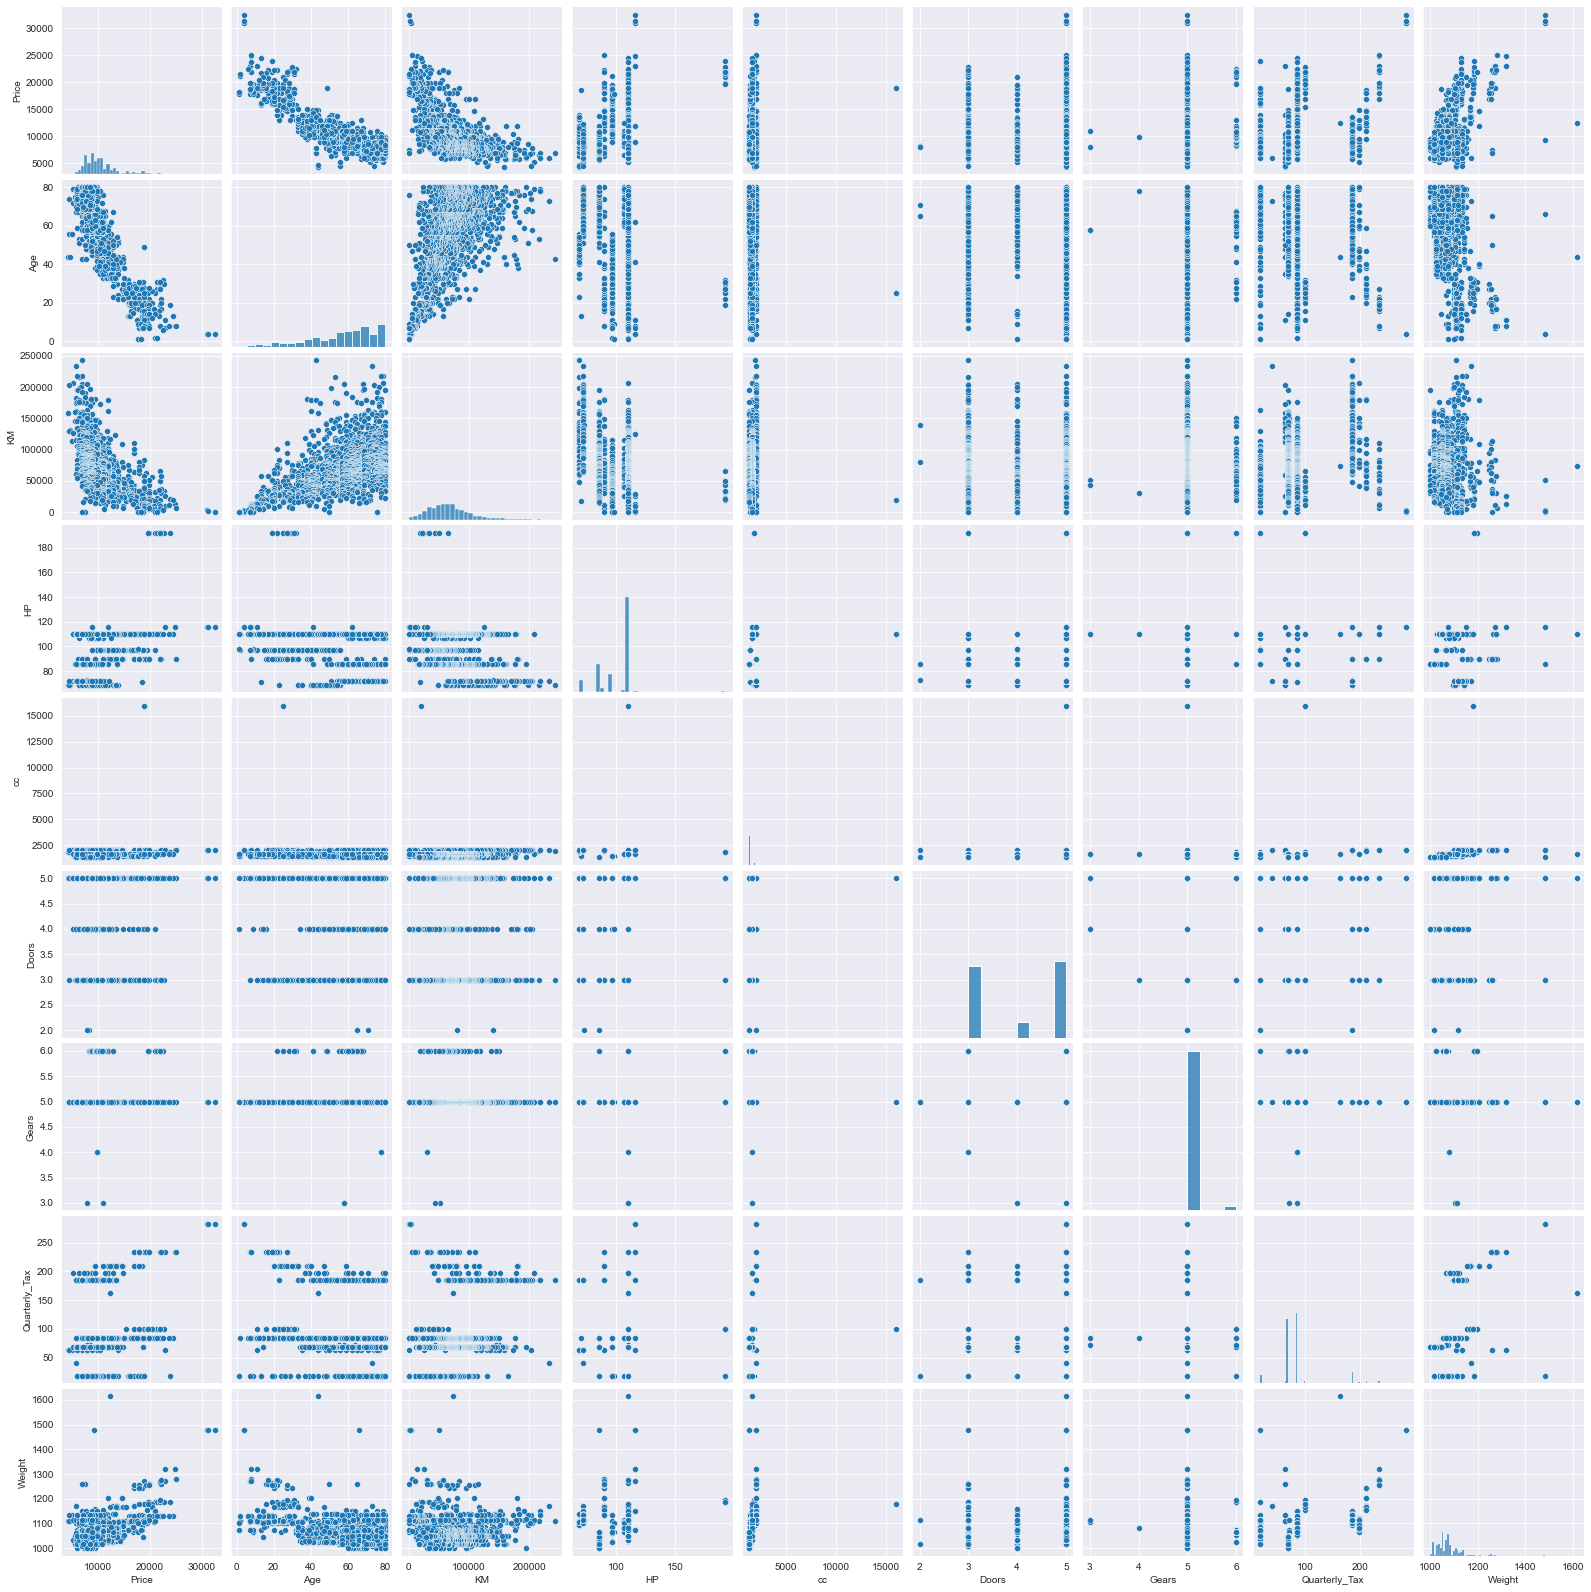

In [47]:
sns.set_style(style='darkgrid')
sns.pairplot(tcars4)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler().fit(tcars4)
X = sc.transform(tcars4)


In [50]:
df_new = pd.DataFrame(X, columns=tcars4.columns)
df_new

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...,...
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


In [51]:
df_new.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [53]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit()
model

# Model Testing

In [54]:
#Coefficients
model.params

Intercept       -1.091141e-15
Age             -6.260959e-01
KM              -2.154415e-01
HP               1.311214e-01
cc              -1.394239e-02
Doors           -2.429200e-04
Gears            3.123373e-02
Quarterly_Tax    4.379794e-02
Weight           2.440552e-01
dtype: float64

In [55]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       -1.111273e-13
Age             -4.655188e+01
KM              -1.655242e+01
HP               1.120972e+01
cc              -1.316436e+00
Doors           -2.301151e-02
Gears            3.034563e+00
Quarterly_Tax    2.944198e+00
Weight           1.576066e+01
dtype: float64 
 Intercept         1.000000e+00
Age              1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [56]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:22:24   Log-Likelihood:                -612.46
No. Observations:                1435   AIC:                             1243.
Df Residuals:                    1426   BIC:                             1290.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.091e-15      0.010  -1.11e-13      1.000      -0.019       0.019
Age              -0.6261      0.013    -46.552      0.000      -0.652      -0.600
KM               -0.2154      0.013    -16.552      0.000      -0.241      -0.190
HP                0.1311      0.012     11.210      0.000       0.108       0.154
cc               -0.0139      0.011     -1.316      0.188      -0.035       0.007
Doors            -0.0002      0.011     -0.023      0.982      -0.021       0.020
Gears             0.0312      0.010      3.035      0.002       0.011       0.051
Quarterly_Tax     0.0438      0.015      2.944      0.003       0.015       0.073
Weight            0.2441      0.015     15.761      0.000       0.214       0.274
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Since the p value for cc and Doors is > 0.05 
# So build simple linear regression and multi linear regression models  to see insignificant variables.


# Simple Linear Regression

In [60]:
ml_cc=smf.ols('Price~cc',data = df_new).fit()  
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)

Intercept   -4.162836e-14
cc           4.745039e+00
dtype: float64 
 Intercept    1.000000
cc           0.000002
dtype: float64


In [61]:
ml_Doors=smf.ols('Price~Doors',data = df_new).fit()  
#t and p-Values
print(ml_Doors.tvalues, '\n', ml_Doors.pvalues)

Intercept   -4.201945e-14
Doors        7.070520e+00
dtype: float64 
 Intercept    1.000000e+00
Doors        2.404166e-12
dtype: float64


# Multiple Linear Regression

In [62]:
ml_cc_Doors=smf.ols('Price~cc+Doors',data = df_new).fit()  
#t and p-Values
print(ml_cc_Doors.tvalues, '\n', ml_cc_Doors.pvalues)

Intercept   -4.227110e-14
cc           4.268006e+00
Doors        6.752236e+00
dtype: float64 
 Intercept    1.000000e+00
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


# Calculating VIF

In [65]:
rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit().rsquared  
vif_age = 1/(1-rsq_rds) 
vif_age

1.0480507936989236

In [66]:
rsq_Km = smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit().rsquared  
vif_Km = 1/(1-rsq_rds) 
vif_Km

1.0480507936989236

In [67]:
rsq_cc = smf.ols('cc~Age+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit().rsquared  
vif_cc= 1/(1-rsq_rds) 
vif_cc

1.0480507936989236

In [68]:
rsq_door = smf.ols('Doors~Age+HP+KM+cc+Gears+Quarterly_Tax+Weight',data=df_new).fit().rsquared  
vif_door= 1/(1-rsq_rds) 
vif_door

1.0480507936989236

In [69]:
rsq_hp= smf.ols('HP~Age+Doors+KM+cc+Gears+Quarterly_Tax+Weight',data=df_new).fit().rsquared  
vif_hp= 1/(1-rsq_rds) 
vif_hp

1.0480507936989236

In [70]:
rsq_gear = smf.ols('Gears~Age+HP+KM+cc+Doors+Quarterly_Tax+Weight',data=df_new).fit().rsquared  
vif_gear= 1/(1-rsq_rds) 
vif_gear

1.0480507936989236

In [71]:
rsq_gear = smf.ols('Weight~Age+HP+KM+cc+Doors+Quarterly_Tax+Gears',data=df_new).fit().rsquared  
vif_gear= 1/(1-rsq_rds) 
vif_gear

1.0480507936989236

# Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model.

# Residual Analysis
Test for Normality of Residuals (Q-Q plot)

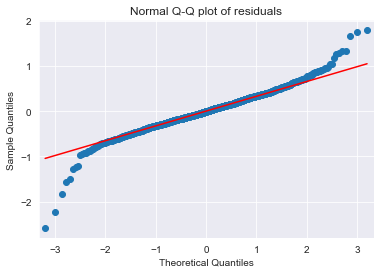

In [72]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [73]:
model.resid

0      -0.912538
1      -0.694059
2      -0.784381
3      -0.403548
4      -0.679206
          ...   
1430   -0.358770
1431    0.707537
1432    0.012354
1433   -0.368463
1434   -0.955263
Length: 1435, dtype: float64

# Residual Plot for Homoscedasticity

In [75]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

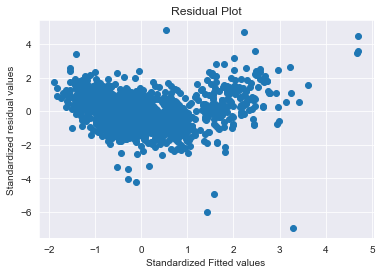

In [76]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


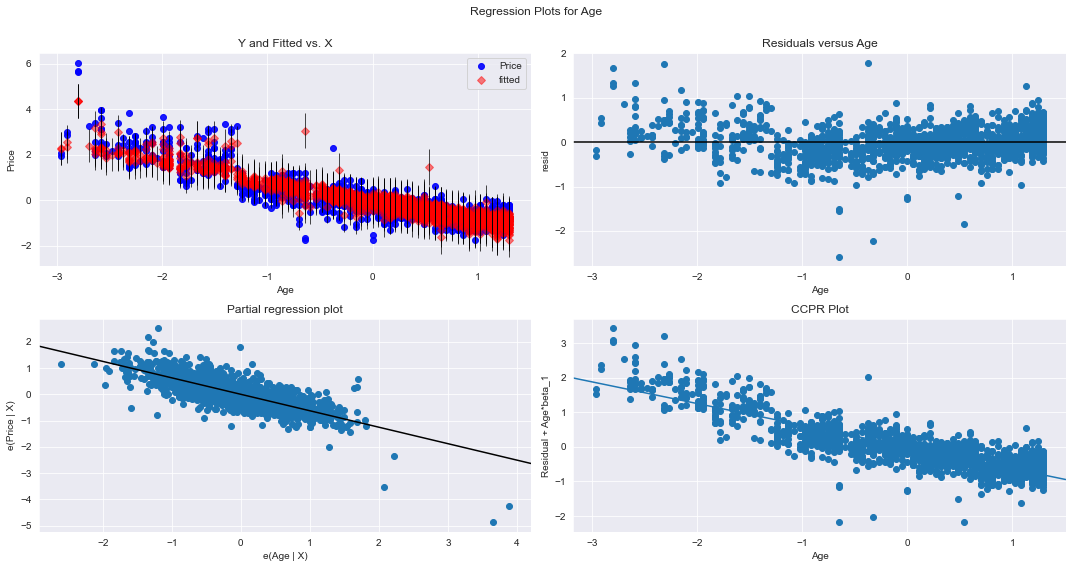

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


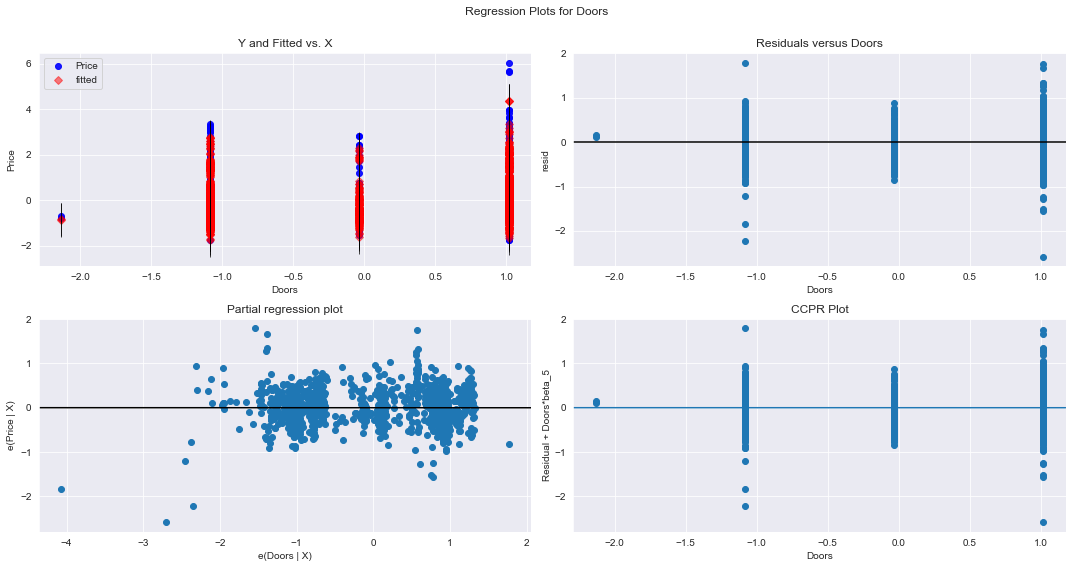

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


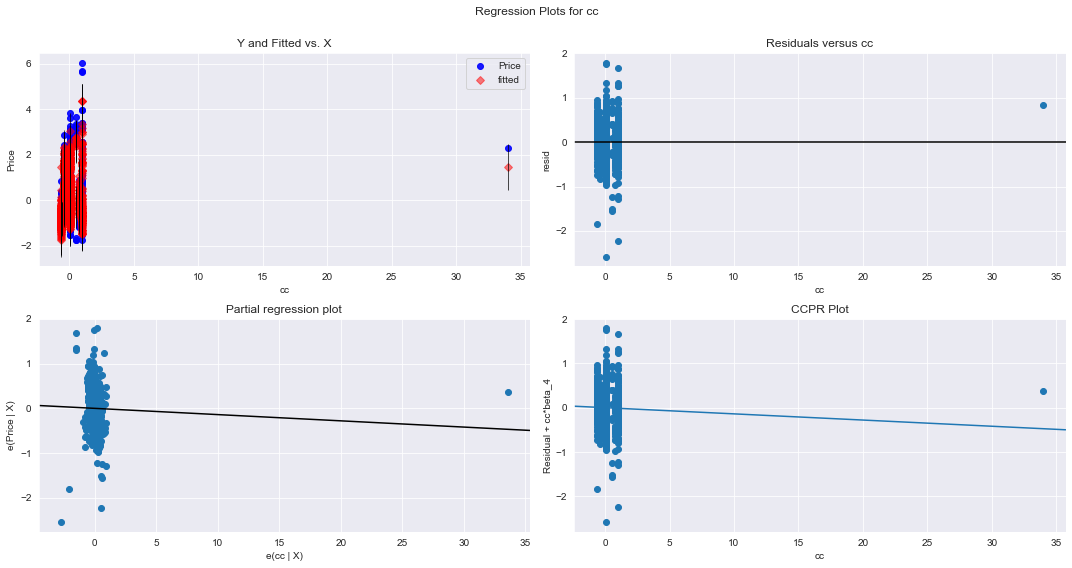

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


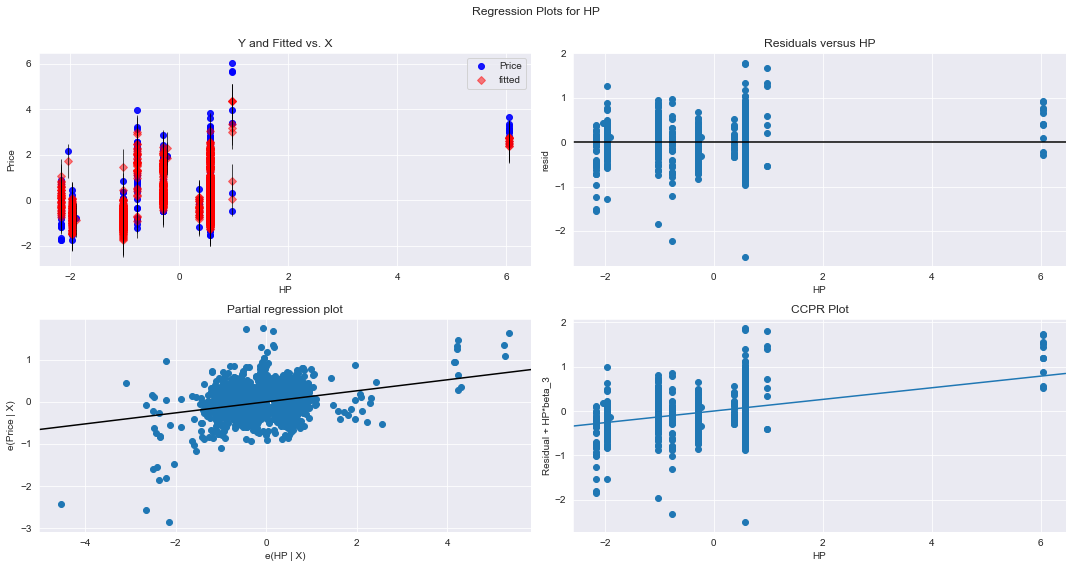

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


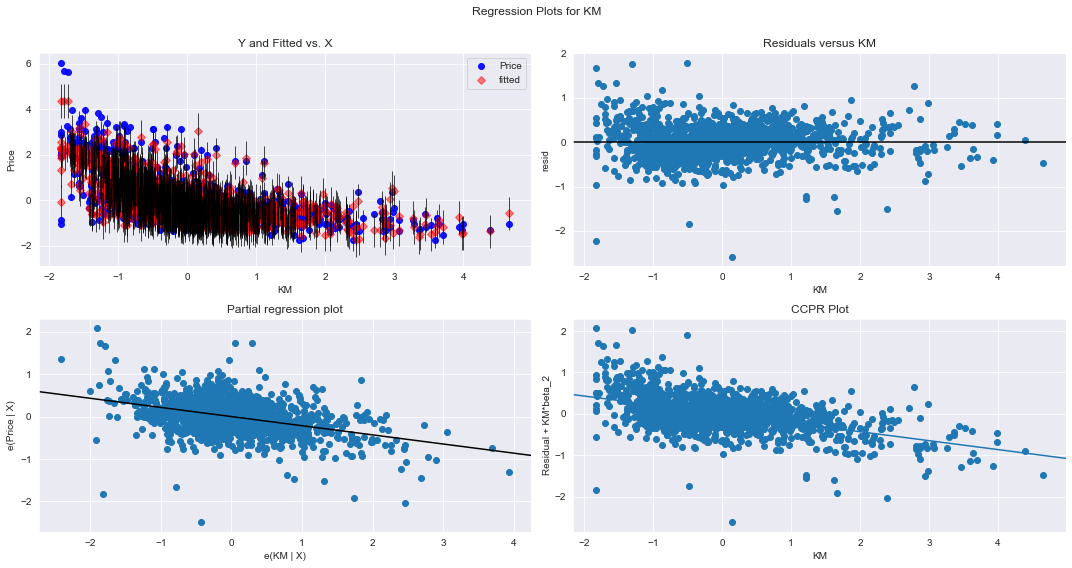

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

# Model Deletion Diagnostics
Detecting Influencers/Outliers
  Cook's Distance

In [82]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

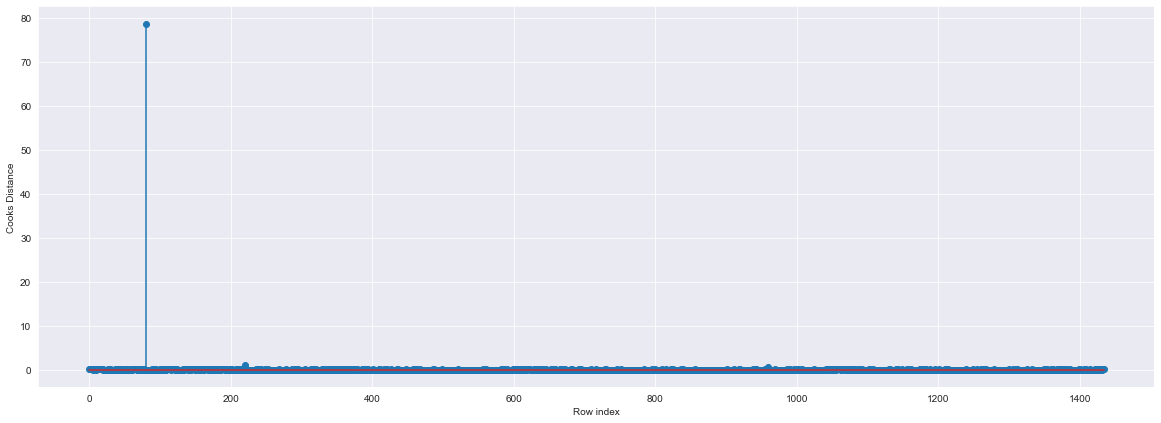

In [83]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.7295058225935)

# High Influence Points

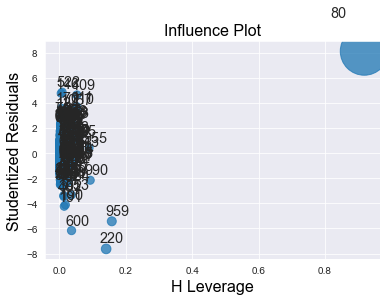

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [87]:
k = df_new.shape[1]
n = df_new.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

# From the above plot, it is evident that data point 80 are the influencers

In [91]:
df_new[df_new.index.isin([49])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
49,3.112727,-1.34616,-0.095784,6.043462,0.526681,1.015659,5.164307,0.317003,2.349306


In [93]:
df_new.shape

(1435, 9)

# Improving the model

In [94]:
#Discard the data points which are influencers and reasign the row number
df_new = df_new.drop(df_new.index[[49]],axis=0).reset_index()

In [95]:
df_new = df_new.drop(['index'],axis=1)

In [97]:
df_new

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...,...
1429,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1430,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1431,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


# Build Model

In [98]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = df_new).fit()

In [99]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8618005257453079, 1238.8254325607163)

In [100]:
#Exclude variable "Doors" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = df_new).fit()

In [101]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8619600134017688, 1237.1695842320905)

# Comparing above R-Square and AIC values, model 'final_ml_W' has high R- square and low AIC value hence include variable 'cc' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [102]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

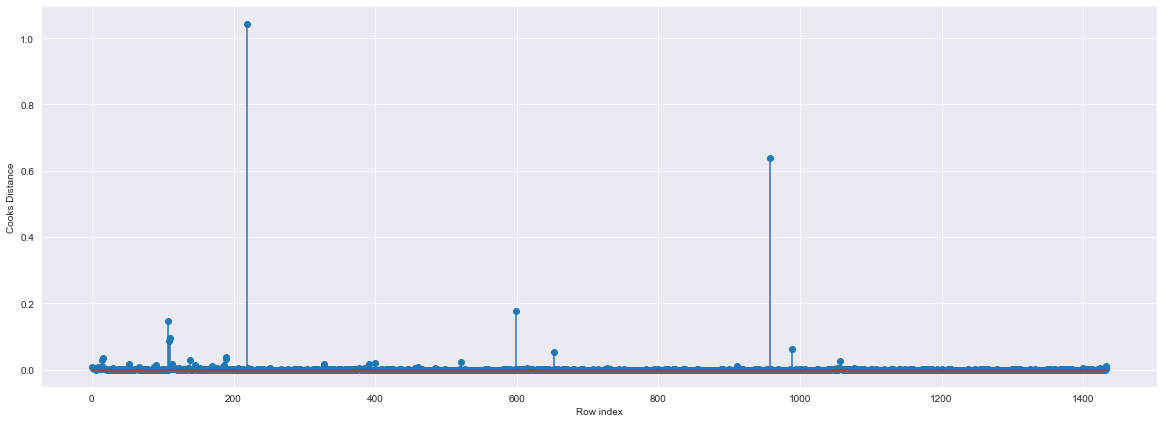

In [103]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [104]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(219, 1.0444214543206847)

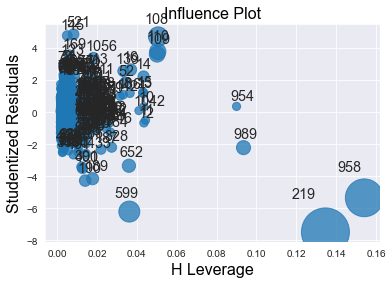

In [108]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_V)
plt.show()

In [109]:
df_new[df_new.index.isin([219,958])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
219,0.479306,-0.645610,0.149427,0.568103,0.055249,1.015659,-0.140475,1.855641,10.390096
958,-0.368933,0.539936,-0.474032,-1.034441,-0.651898,-1.084443,-0.140475,-1.661245,7.805557


# Improving the model

In [111]:
df_new = df_new.drop(df_new.index[[219,958]],axis=0).reset_index()

In [112]:
df_new = df_new.drop(['index'],axis=1)

# Build Model

In [113]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = df_new).fit()

In [114]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8711172102458518, 1138.8044084260669)

In [115]:
#Exclude variable "Doors" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = df_new).fit()

In [116]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8714399377645226, 1135.2141277462952)

# Comparing above R-Square and AIC values, model 'final_ml_W' has high R- square and low AIC value hence include variable 'cc' so that multi collinearity problem would be resolved.

In [118]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

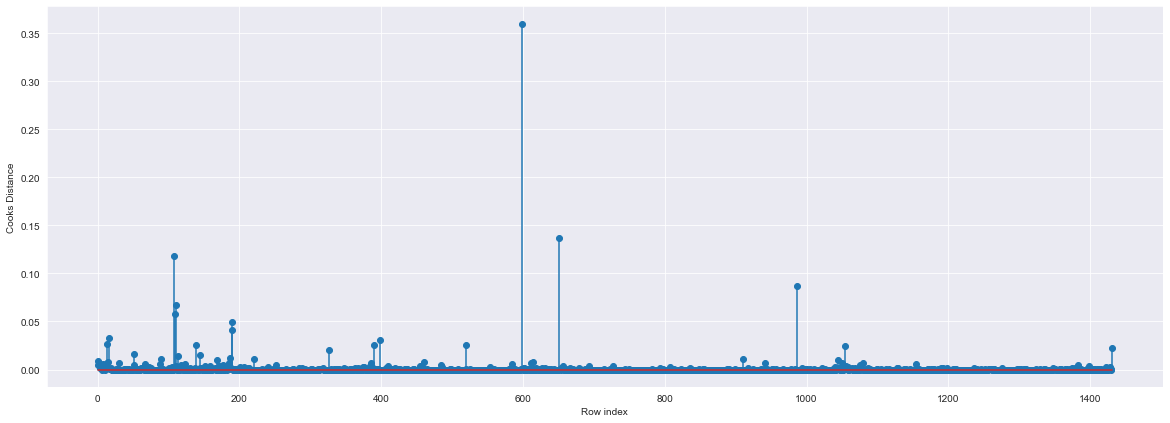

In [119]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [120]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(598, 0.3603219013197509)

# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [121]:
#New data for prediction
new_data=pd.DataFrame({'Age':24, 'KM':45000, 'HP':85, 'cc':1500, 'Doors':4, 'Gears':5, 'Quarterly_Tax':100,
       'Weight':1200},index=[1])
new_data

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,24,45000,85,1500,4,5,100,1200


In [130]:
Final_Model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tcars4).fit()

In [131]:
Final_Model.predict(new_data)

1    16777.338056
dtype: float64

In [132]:
pred_y = Final_Model.predict(tcars4)
pred_y

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64

In [133]:
table=pd.DataFrame({'Prepared_models':['Model','Final_Model'],'Rsquared':[model.rsquared,Final_Model.rsquared]}
)
table

,Prepared_models,Rsquared
0,Model,0.86252
1,Final_Model,0.86252
